In [4]:
import numpy as np
import pandas as pd
import scanpy.api as sc
import seaborn as sb

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

from matplotlib import rcParams

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('default')  

#-- 
#https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html



/projects/nehard/SingleCell/Jupyter/scanpy/scanpy/api/__init__.py:6: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning,


scanpy==1.4.5.dev134+gd9c6f0a anndata==0.6.22.post1 umap==0.3.9 numpy==1.16.4 scipy==1.3.1 pandas==0.24.2 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [2]:
sc.settings.set_figure_params(dpi=80)

In [3]:
corrected=sc.read('../H5AD/LifeSpan_AC_100819.h5ad')
corrected

AnnData object with n_obs × n_vars = 426594 × 1094 
    obs: 'Gender', 'Samples', 'Names', 'Age', 'Batches', 'Groups', 'Sample_ids', 'IDs', 'doublet_score', 'predicted_doublets_1', 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'clusters'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Batches_colors', 'Groups_colors', 'clusters_colors', 'dendrogram_clusters', 'louvain', 'louvain_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [4]:
corrected.obs['clusters'].value_counts().filter(like='mono', axis=0)

C1_CD14_mono     43884
C12_CD16_mono    10094
Name: clusters, dtype: int64

In [5]:
#-------------- extract Cluster 1 (CD14) and 12 (CD16)
#-- cells from CL
cells_of_interest =corrected.obs.loc[corrected.obs["louvain"].isin(["1","12"]), :].index

mono = corrected[cells_of_interest, :]
mono

View of AnnData object with n_obs × n_vars = 53978 × 1094 
    obs: 'Gender', 'Samples', 'Names', 'Age', 'Batches', 'Groups', 'Sample_ids', 'IDs', 'doublet_score', 'predicted_doublets_1', 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'clusters'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Batches_colors', 'Groups_colors', 'clusters_colors', 'dendrogram_clusters', 'louvain', 'louvain_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [6]:

#-- runing Louvain
sc.tl.louvain(mono, resolution=0.6) #default , resolution = 1

#-- runing UMAP
sc.tl.umap(mono, min_dist=0.3, n_components=3)

running Louvain clustering
    using the "louvain" package of Traag (2017)


Trying to set attribute `.obs` of view, making a copy.


    finished: found 9 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:31)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:27)


In [5]:
mono=sc.read('./H5AD/Mono_101419.h5ad')
mono

AnnData object with n_obs × n_vars = 53978 × 1094 
    obs: 'Gender', 'Samples', 'Names', 'Age', 'Batches', 'Groups', 'Sample_ids', 'IDs', 'doublet_score', 'predicted_doublets_1', 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'clusters'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Batches_colors', 'Groups_colors', 'clusters_colors', 'dendrogram_clusters', 'louvain', 'louvain_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [17]:
#-- -colors 

col_ids =['tomato','paleturquoise','cornflowerblue','mediumseagreen','mediumpurple','goldenrod','lightgreen','palevioletred','lightsalmon','thistle', #0-9
          "brown","plum","lightskyblue","yellowgreen","mediumorchid","mediumturquoise","peru","darkviolet","mediumaquamarine","lightslategrey","dodgerblue"]
col_groups =['lightsalmon','mediumaquamarine','tomato','lightskyblue']



In [18]:
mono.uns['Batches_colors']= col_ids
mono.uns['louvain_colors']= col_ids
mono.uns['clusters_colors']= col_ids
mono.uns['Groups_colors']= col_groups

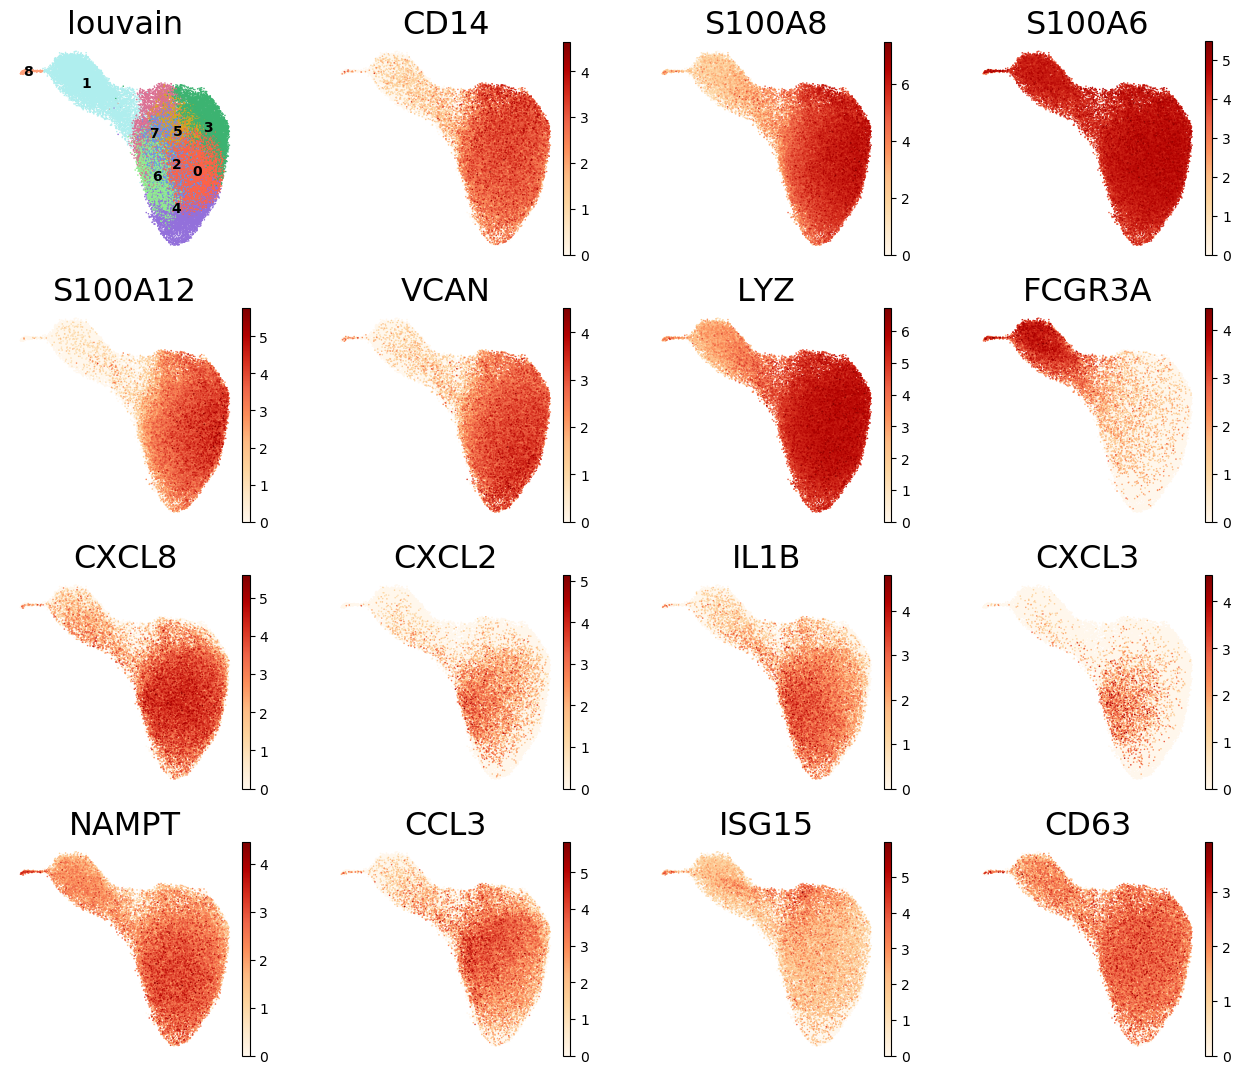

In [13]:

matplotlib.style.use('default')  
rcParams['figure.figsize'] = (3,3)

plt.rc('font', size=23)          # controls default text sizes
plt.rc('axes', titlesize=23)     # fontsize of the axes title
plt.rc('axes', labelsize=10)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Genes = ['louvain','CD14','S100A8','S100A6',
         'S100A12','VCAN','LYZ','FCGR3A',
         'CXCL8','CXCL2','IL1B','CXCL3',
         'NAMPT','CCL3','ISG15','CD63']
sc.pl.umap(mono, 
           color=Genes, 
           color_map='OrRd',
           size=5, 
           ncols=4,
           frameon=False,
           #legend_fontweight=['bold'], 
           legend_loc='on data', 
           legend_fontsize=10) #,save='cDC_ForGrant.pdf'

In [9]:
mono.obs.louvain.value_counts()

0    9773
1    9083
2    8879
3    7141
4    6035
5    5114
6    3891
7    3799
8     263
Name: louvain, dtype: int64

In [11]:
#-----------  Object + meta data 

#--- Umap embbedings 
Emb =mono.obsm.to_df()[['X_umap1', 'X_umap2', 'X_umap3']]
Emb.index =mono.obs.index

#-- Meta Data 
meta =mono.obs
Mat = meta.join(Emb)

Mat.to_csv('./Meta/Meta_mono_101419.csv')
mono.write('./H5AD/Mono_101419.h5ad')


In [46]:
mono.uns['Batches_colors']= col_ids
mono.uns['louvain_colors']= col_ids
mono.uns['clusters_colors']= col_ids
mono.uns['Groups_colors']= col_groups

In [40]:
marker_genes_dict = {'CD14': ['CD14','S100A8','S100A6','S100A12','VCAN','LYZ'],
                     'CD16': ['FCGR3A'],
                     'proinflam': [ 'CXCL8','CXCL2','IL1B','CXCL3','NAMPT','CCL3','CCL3L1'],
                     'ISGs':['ISG15','LY6E','IFI6']}

categories: 0, 1, 2, etc.
var_group_labels: CD14, CD16, proinflam, etc.


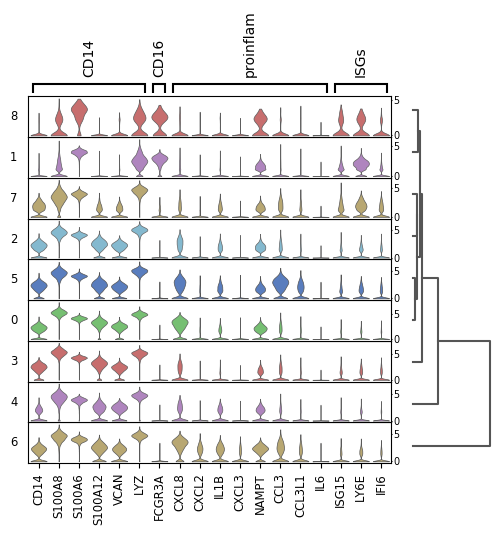

In [41]:

#cParams['figure.figsize'] = (3,3)
matplotlib.style.use('default')  

ax = sc.pl.stacked_violin(mono, 
                          marker_genes_dict,
                         #genes, 
                          groupby='louvain', 
                          swap_axes=False,
                         dendrogram=True,
                          figsize=(6,5))


In [30]:
genes = ['CD14','S100A8',
         'S100A12','VCAN','LYZ','FCGR3A','S100A6','CD63',
         'CXCL8','CXCL2','IL1B',
         'NAMPT','CCL3','CXCL3','ISG15']

In [28]:
import numpy as np
ad = mono.copy()
ad.raw.X.data = np.exp(ad.raw.X.data)

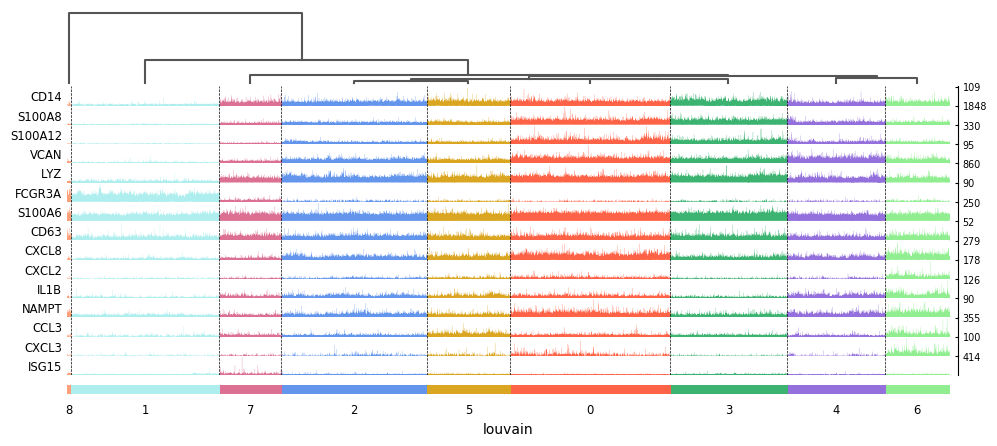

In [31]:
ax = sc.pl.tracksplot(ad,genes, groupby='louvain', dendrogram=True)


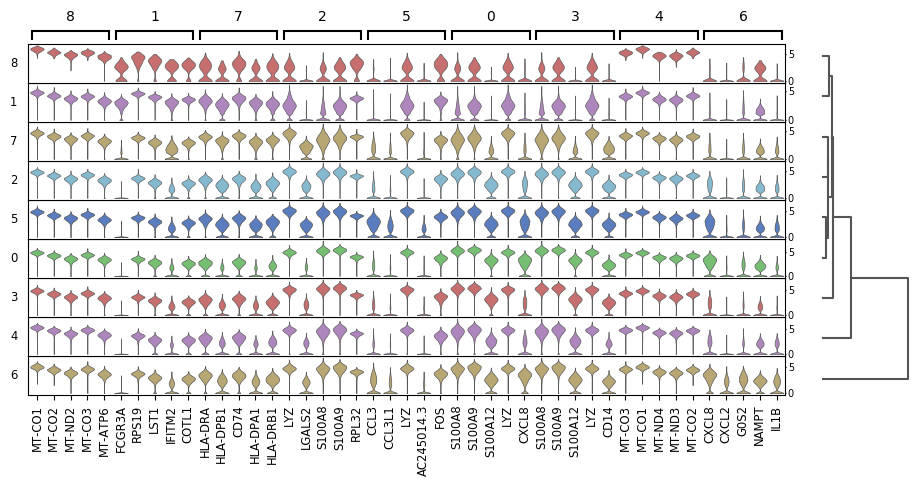

In [36]:
matplotlib.style.use('default')  
sc.pl.rank_genes_groups_stacked_violin(mono, n_genes=5)


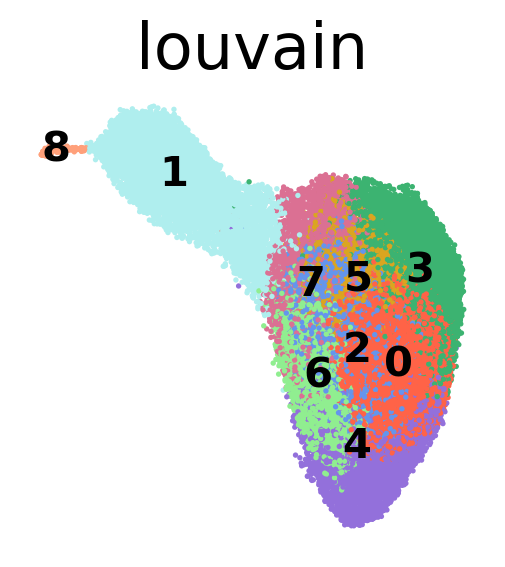

In [36]:
matplotlib.style.use('default')  
rcParams['figure.figsize'] = (3,3)

plt.rc('font', size=23)          # controls default text sizes
plt.rc('axes', titlesize=23)     # fontsize of the axes title
plt.rc('axes', labelsize=10)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Genes = ['louvain']
sc.pl.umap(mono, 
           color=Genes, 
           color_map='OrRd',
           size=15, 
           ncols=3,
           frameon=False,
           #legend_fontweight=['bold'], 
           legend_loc='on data', 
           legend_fontsize=15) #,save='cDC_ForGrant.pdf'

In [20]:
list(range(0,10,1))

'range(0, 10)'

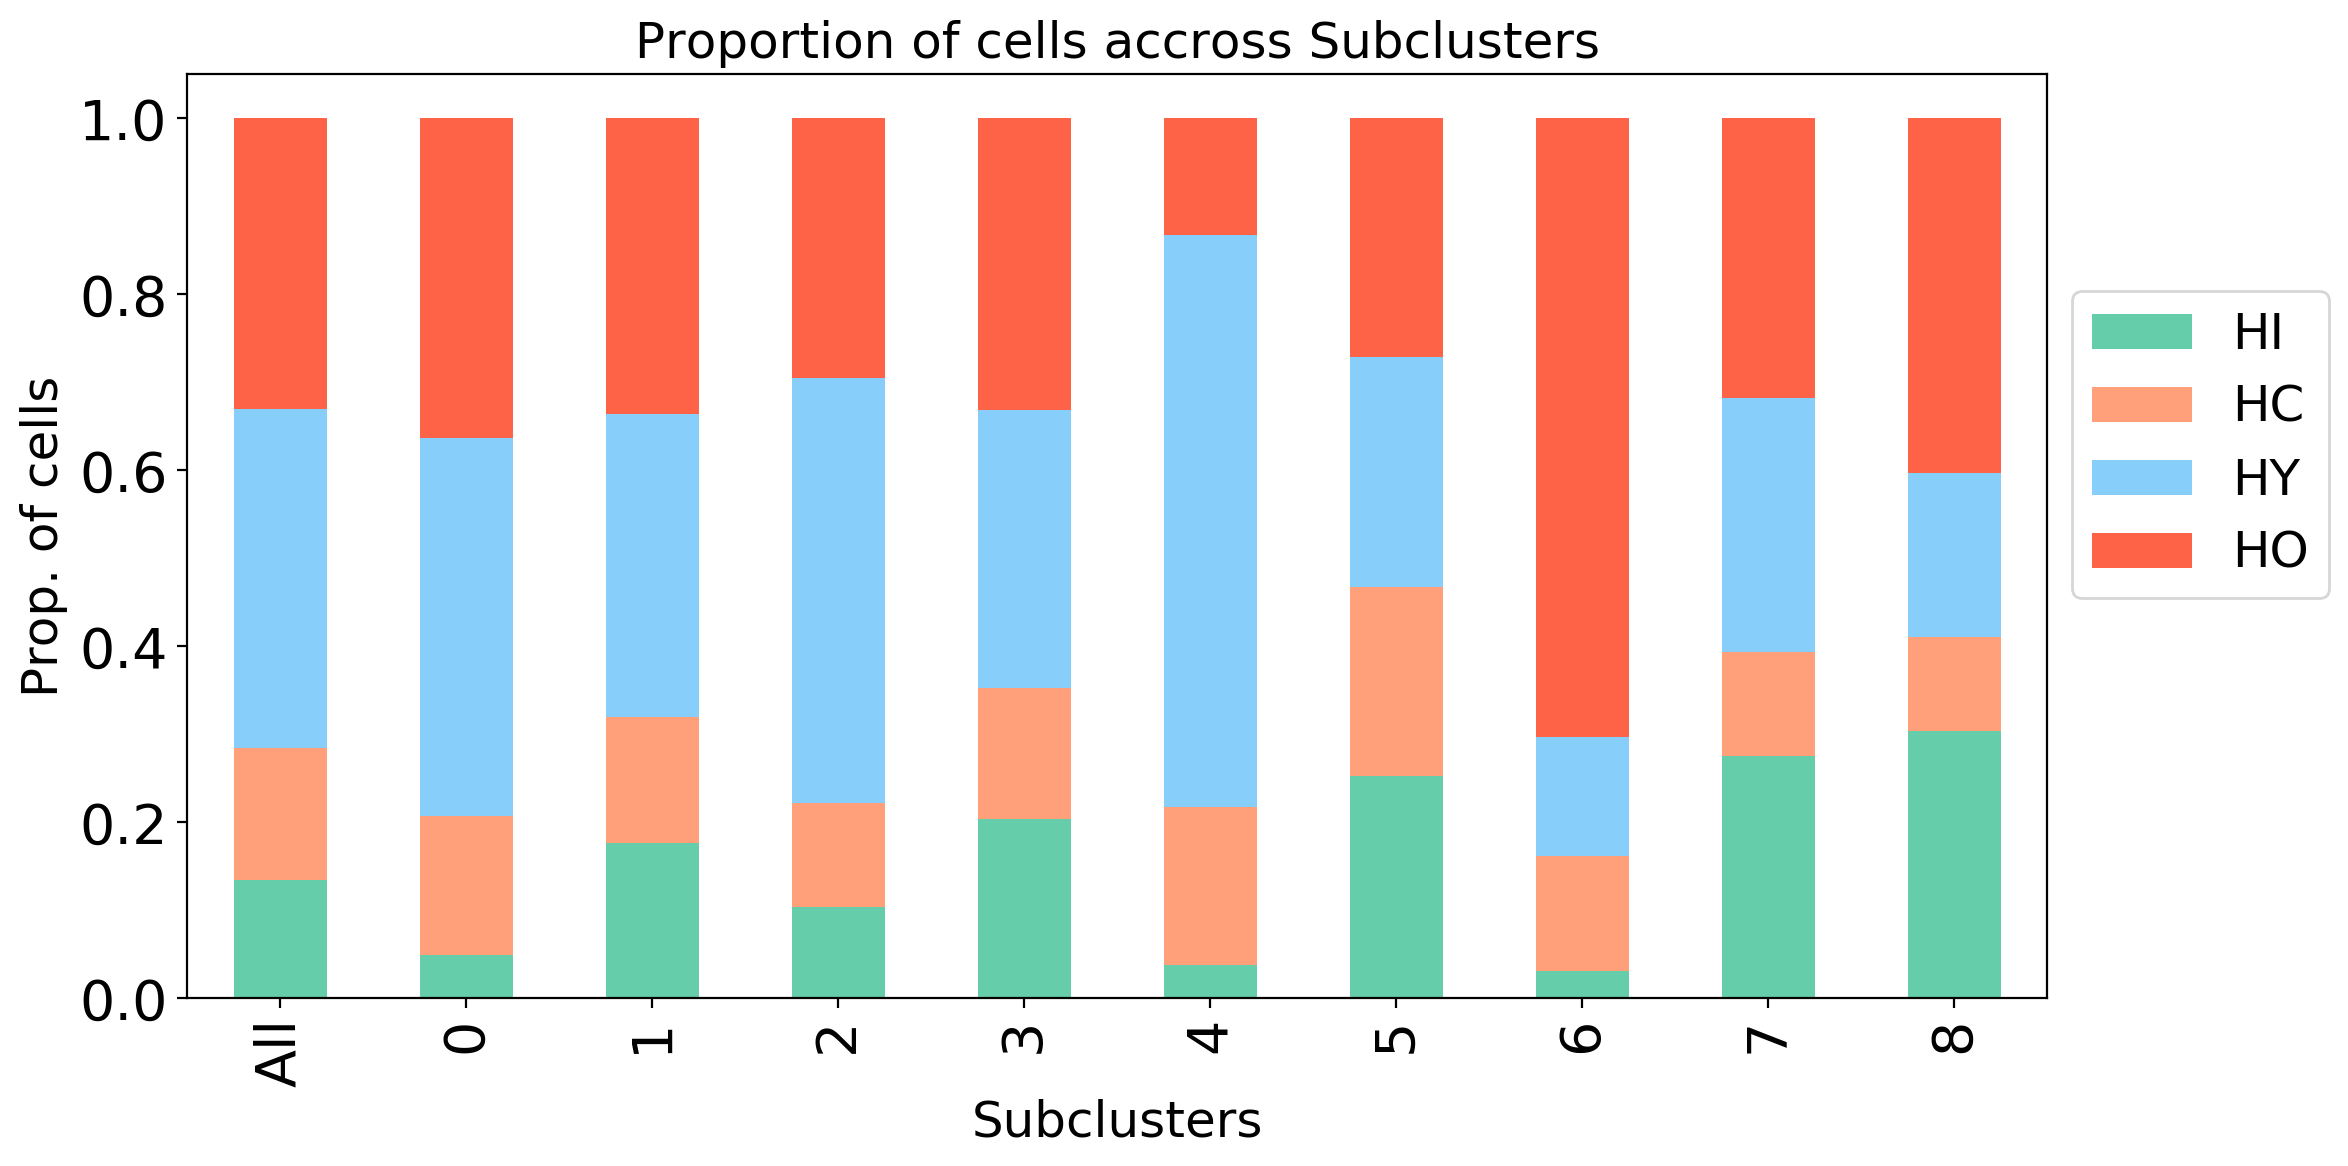

In [29]:
#-- proportion table
Groups_tab = pd.crosstab(index=mono.obs['louvain'],  # Make a crosstab
                        columns=mono.obs['Groups'], 
                         margins=True)               # Name the count column

#-- change index and columns order
Groups_tab = Groups_tab.reindex(['All','0','1','2','3','4','5','6','7','8'])

Groups_tab = Groups_tab[['HI','HC','HY','HO','All']]

MyTab= Groups_tab.div(Groups_tab["All"], axis=0)
MyTab2 = MyTab.drop(columns="All")

#Col_Group=["dimgrey","lightcoral",'royalblue',"darkseagreen"]

MyTab2.plot(kind="bar",
            figsize=(12,6),
            stacked=True, 
            linewidth=0.5, 
            width=0.5, #***
            fontsize=20, 
            color=col_groups)

plt.title("Proportion of cells accross Subclusters", fontsize=18)
plt.ylabel("Prop. of cells", fontsize=18)
plt.xlabel("Subclusters", fontsize=18)
plt.ylim=1.0

plt.legend(loc='center left', bbox_to_anchor=(1, 0.6), fontsize=18)
plt.show()

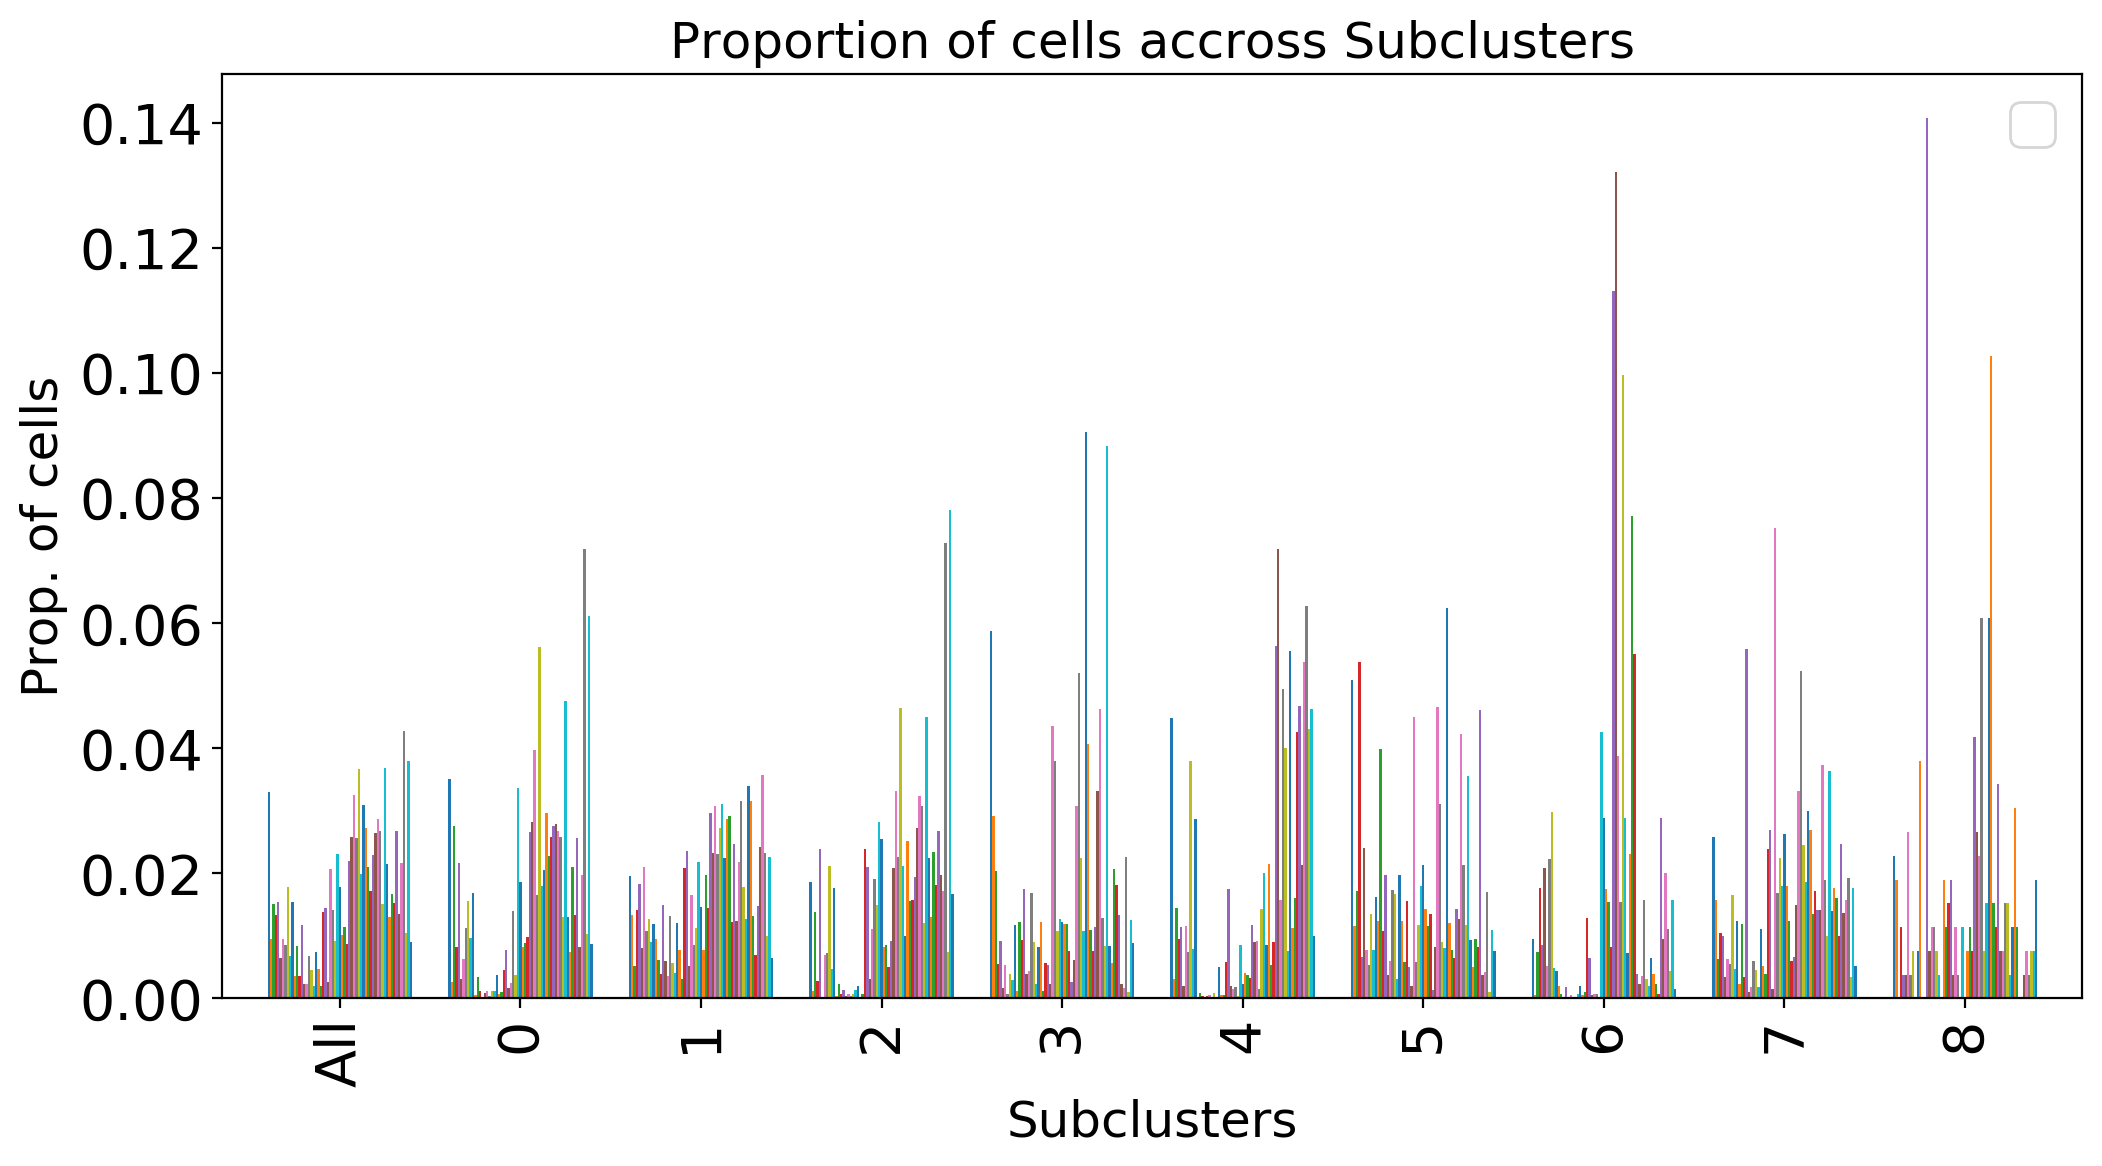

In [30]:
#-- proportion table
Groups_tab = pd.crosstab(index=mono.obs['louvain'],  # Make a crosstab
                        columns=mono.obs['Names'], margins=True)               # Name the count column

#-- change index and columns order
Groups_tab = Groups_tab.reindex(['All','0','1','2','3','4','5','6','7','8'])

#Groups_tab = Groups_tab[['HI','HC','HY','HO','All']]

MyTab= Groups_tab.div(Groups_tab["All"], axis=0)
MyTab2 = MyTab.drop(columns="All")


MyTab2.plot(kind="bar",
            figsize=(12,6),
            stacked=False, #***
            linewidth=1, 
            width=0.8, fontsize=20) #, color=Col_Group)


plt.title("Proportion of cells accross Subclusters", fontsize=18)
plt.ylabel("Prop. of cells", fontsize=18)
plt.xlabel("Subclusters", fontsize=18)
plt.ylim=1.0
#-- remove legend labels 
plt.legend('')
plt.show()

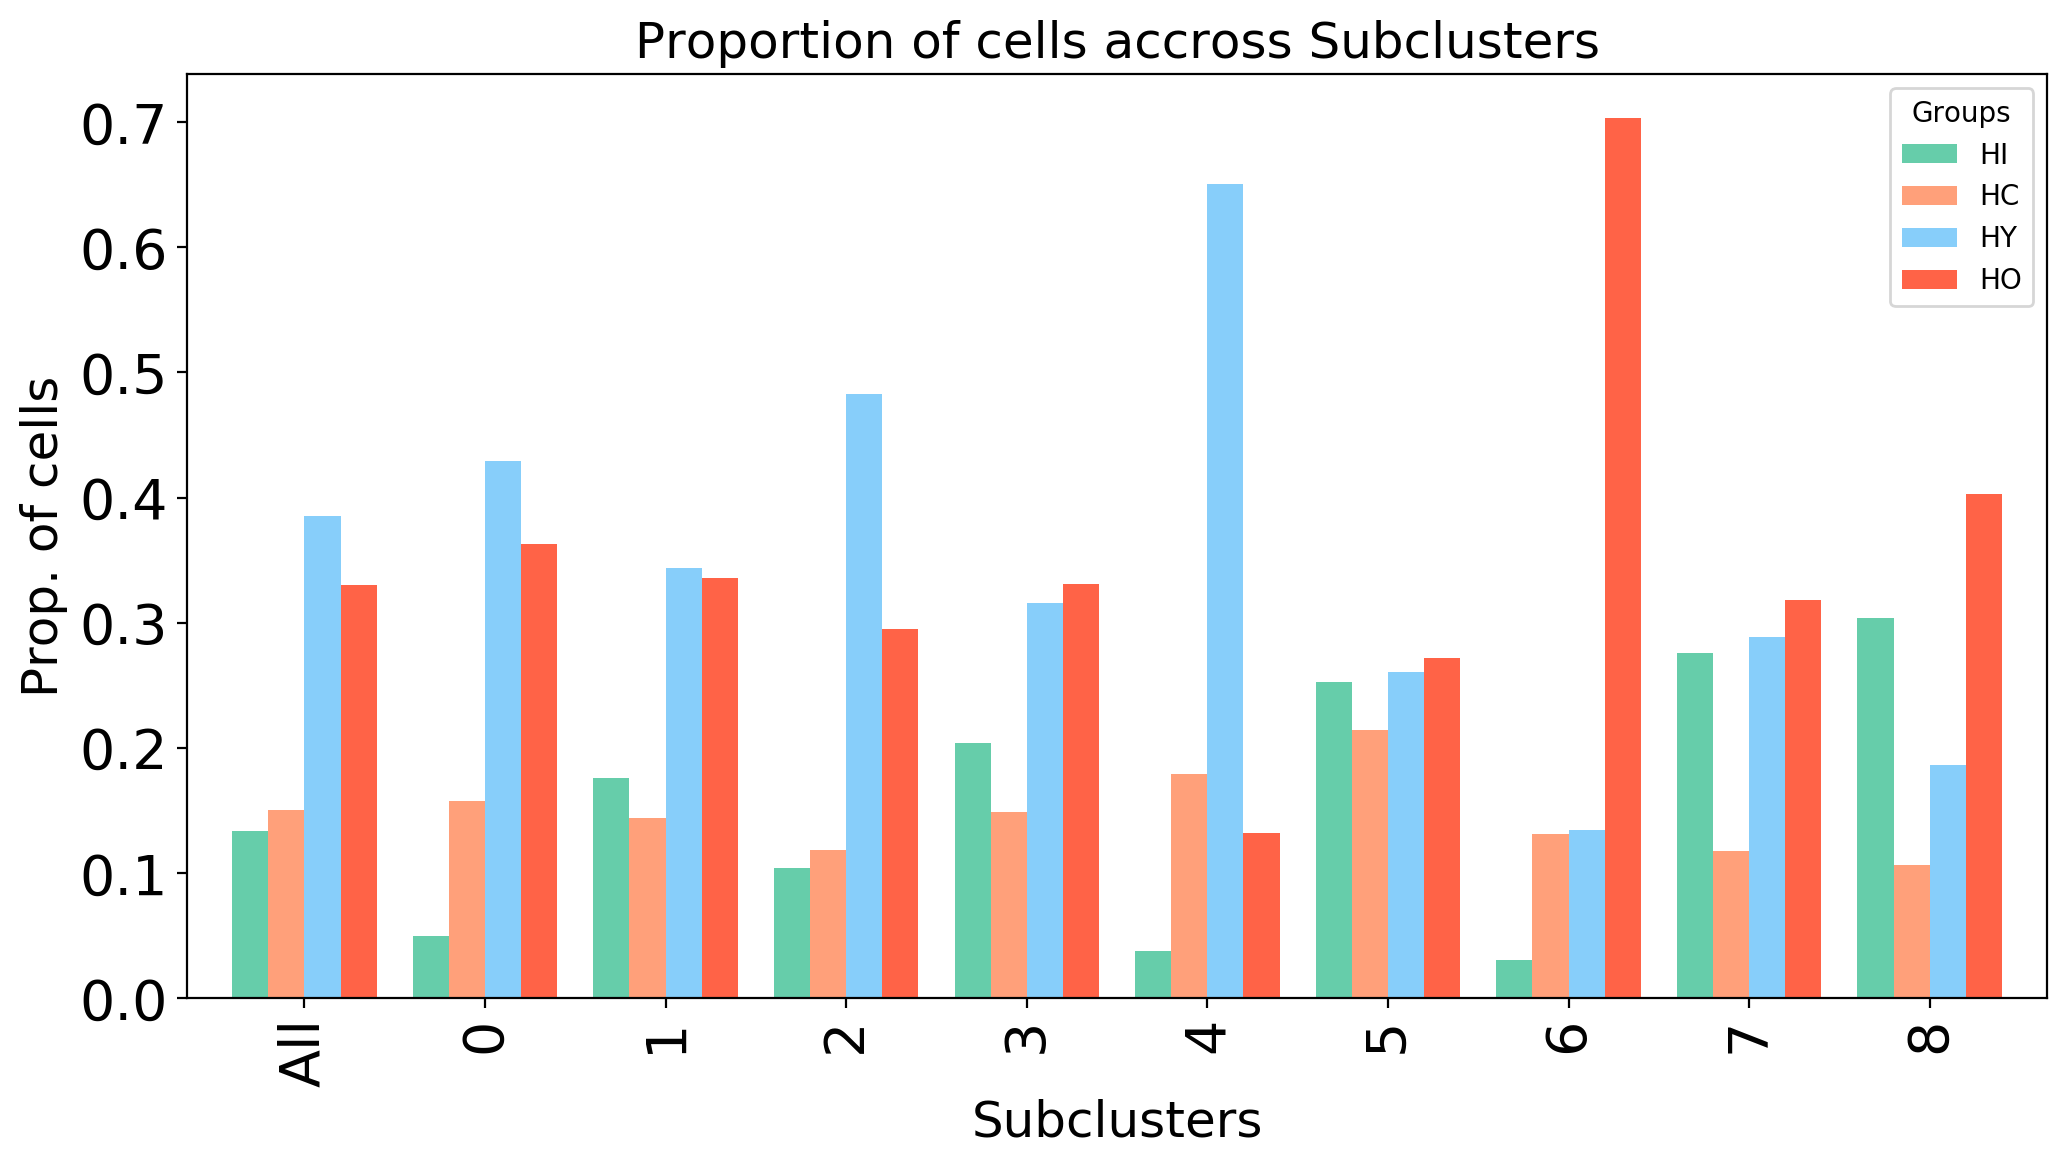

In [33]:

#-- proportion table
Groups_tab = pd.crosstab(index=mono.obs['louvain'],  # Make a crosstab
                        columns=mono.obs['Groups'], margins=True)               # Name the count column

#-- change index and columns order
Groups_tab = Groups_tab.reindex(['All','0','1','2','3','4','5','6','7','8'])

Groups_tab = Groups_tab[['HI','HC','HY','HO','All']]

MyTab= Groups_tab.div(Groups_tab["All"], axis=0)
MyTab2 = MyTab.drop(columns="All")


Col_Group=["dimgrey","lightcoral",'royalblue',"darkseagreen"]

MyTab2.plot(kind="bar",
            figsize=(12,6),
            stacked=False, 
            linewidth=1, 
            width=0.8, fontsize=20, color=col_groups)

plt.title("Proportion of cells accross Subclusters", fontsize=18)
plt.ylabel("Prop. of cells", fontsize=18)
plt.xlabel("Subclusters", fontsize=18)
plt.ylim=1.0


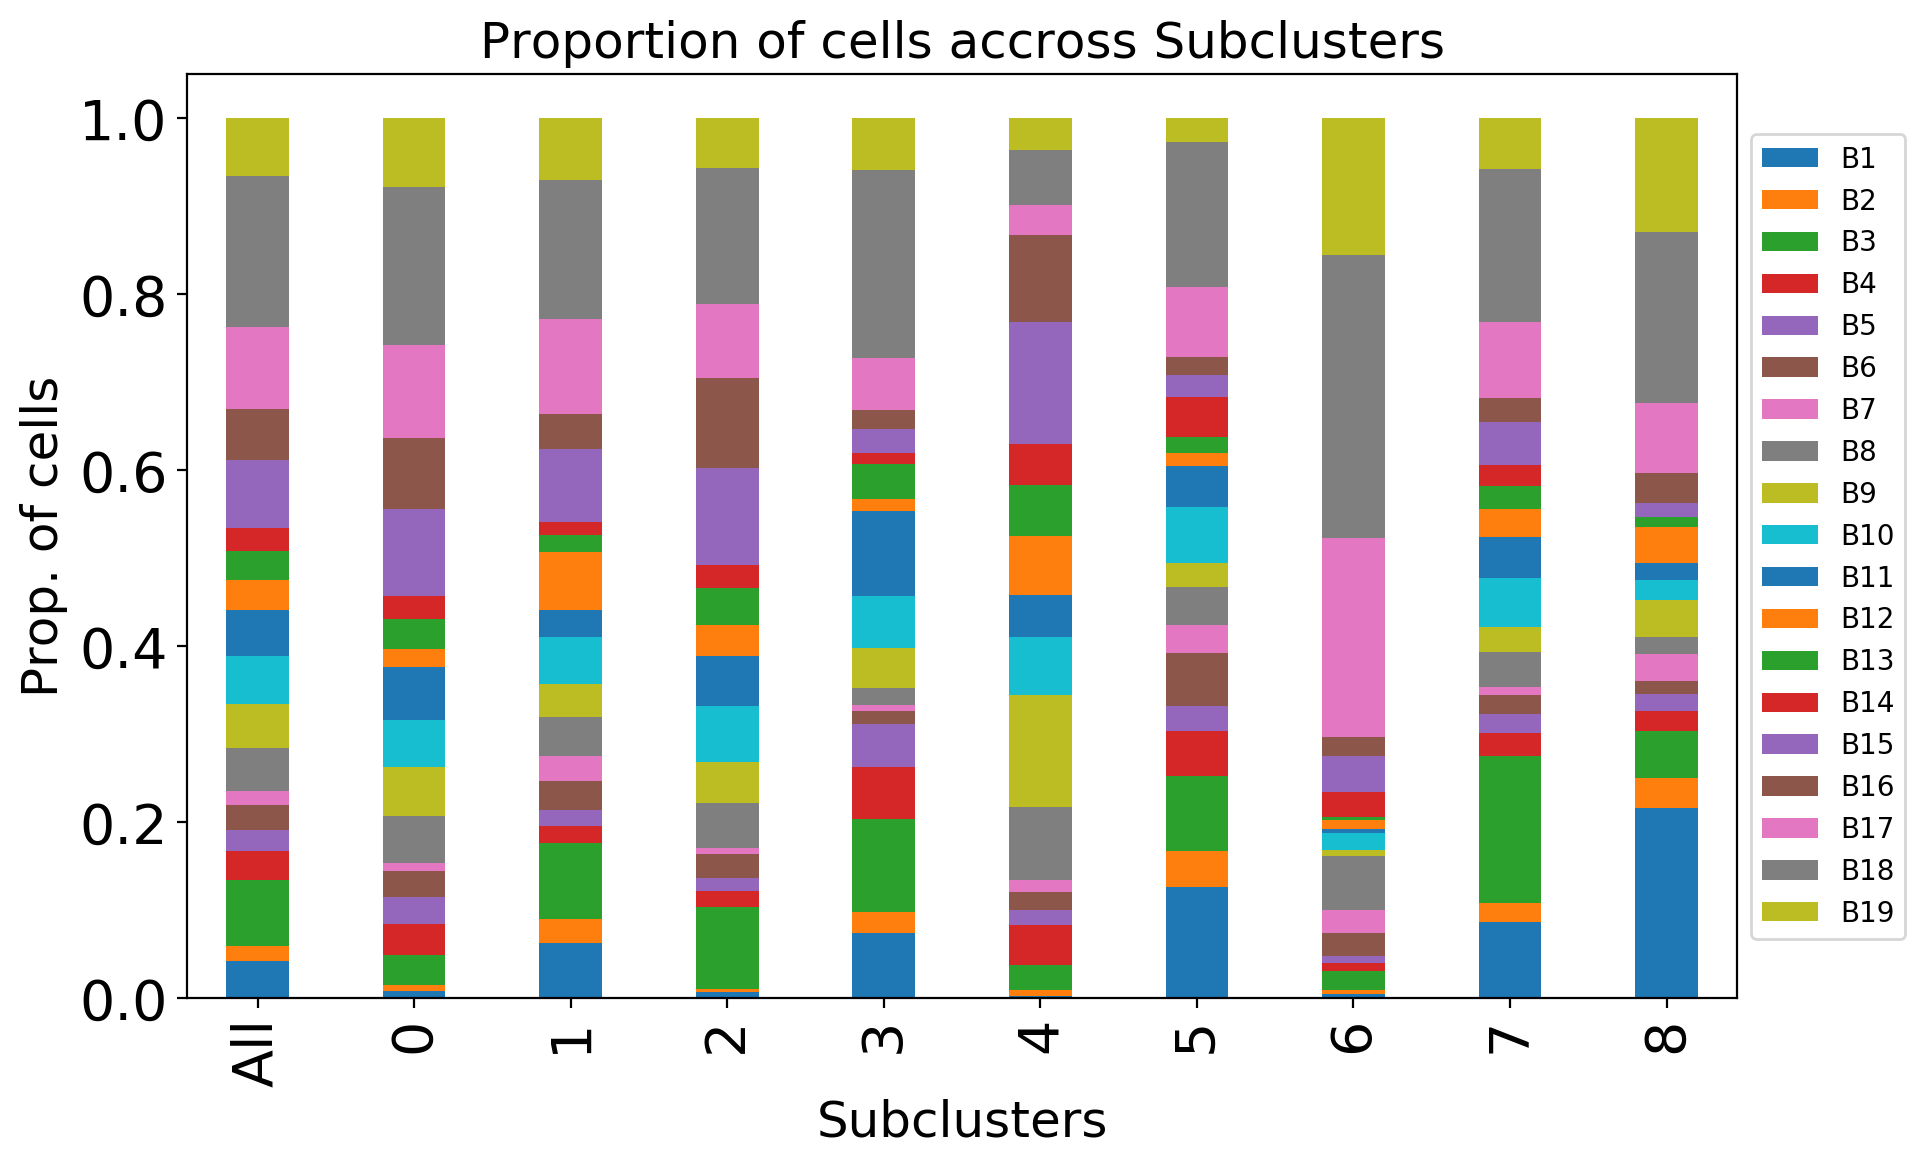

In [34]:

#-- proportion table
Groups_tab = pd.crosstab(index=mono.obs['louvain'],  # Make a crosstab
                        columns=mono.obs['Batches'], margins=True)               # Name the count column

#-- change index and columns order
Groups_tab = Groups_tab.reindex(['All','0','1','2','3','4','5','6','7','8'])

MyTab= Groups_tab.div(Groups_tab["All"], axis=0)
MyTab2 = MyTab.drop(columns="All")

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('default')   
#colors
Col_Group=["dimgrey","lightcoral",'royalblue',"darkseagreen"]

MyTab2.plot(kind="bar",
            figsize=(10,6),
            stacked=True, #**
            linewidth=0.6,#**
            width=0.4, 
            fontsize=20) #, color=Col_Group




plt.title("Proportion of cells accross Subclusters", fontsize=18)
plt.ylabel("Prop. of cells", fontsize=18)
plt.xlabel("Subclusters", fontsize=18)
plt.ylim=1.0

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.show()



ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:12)


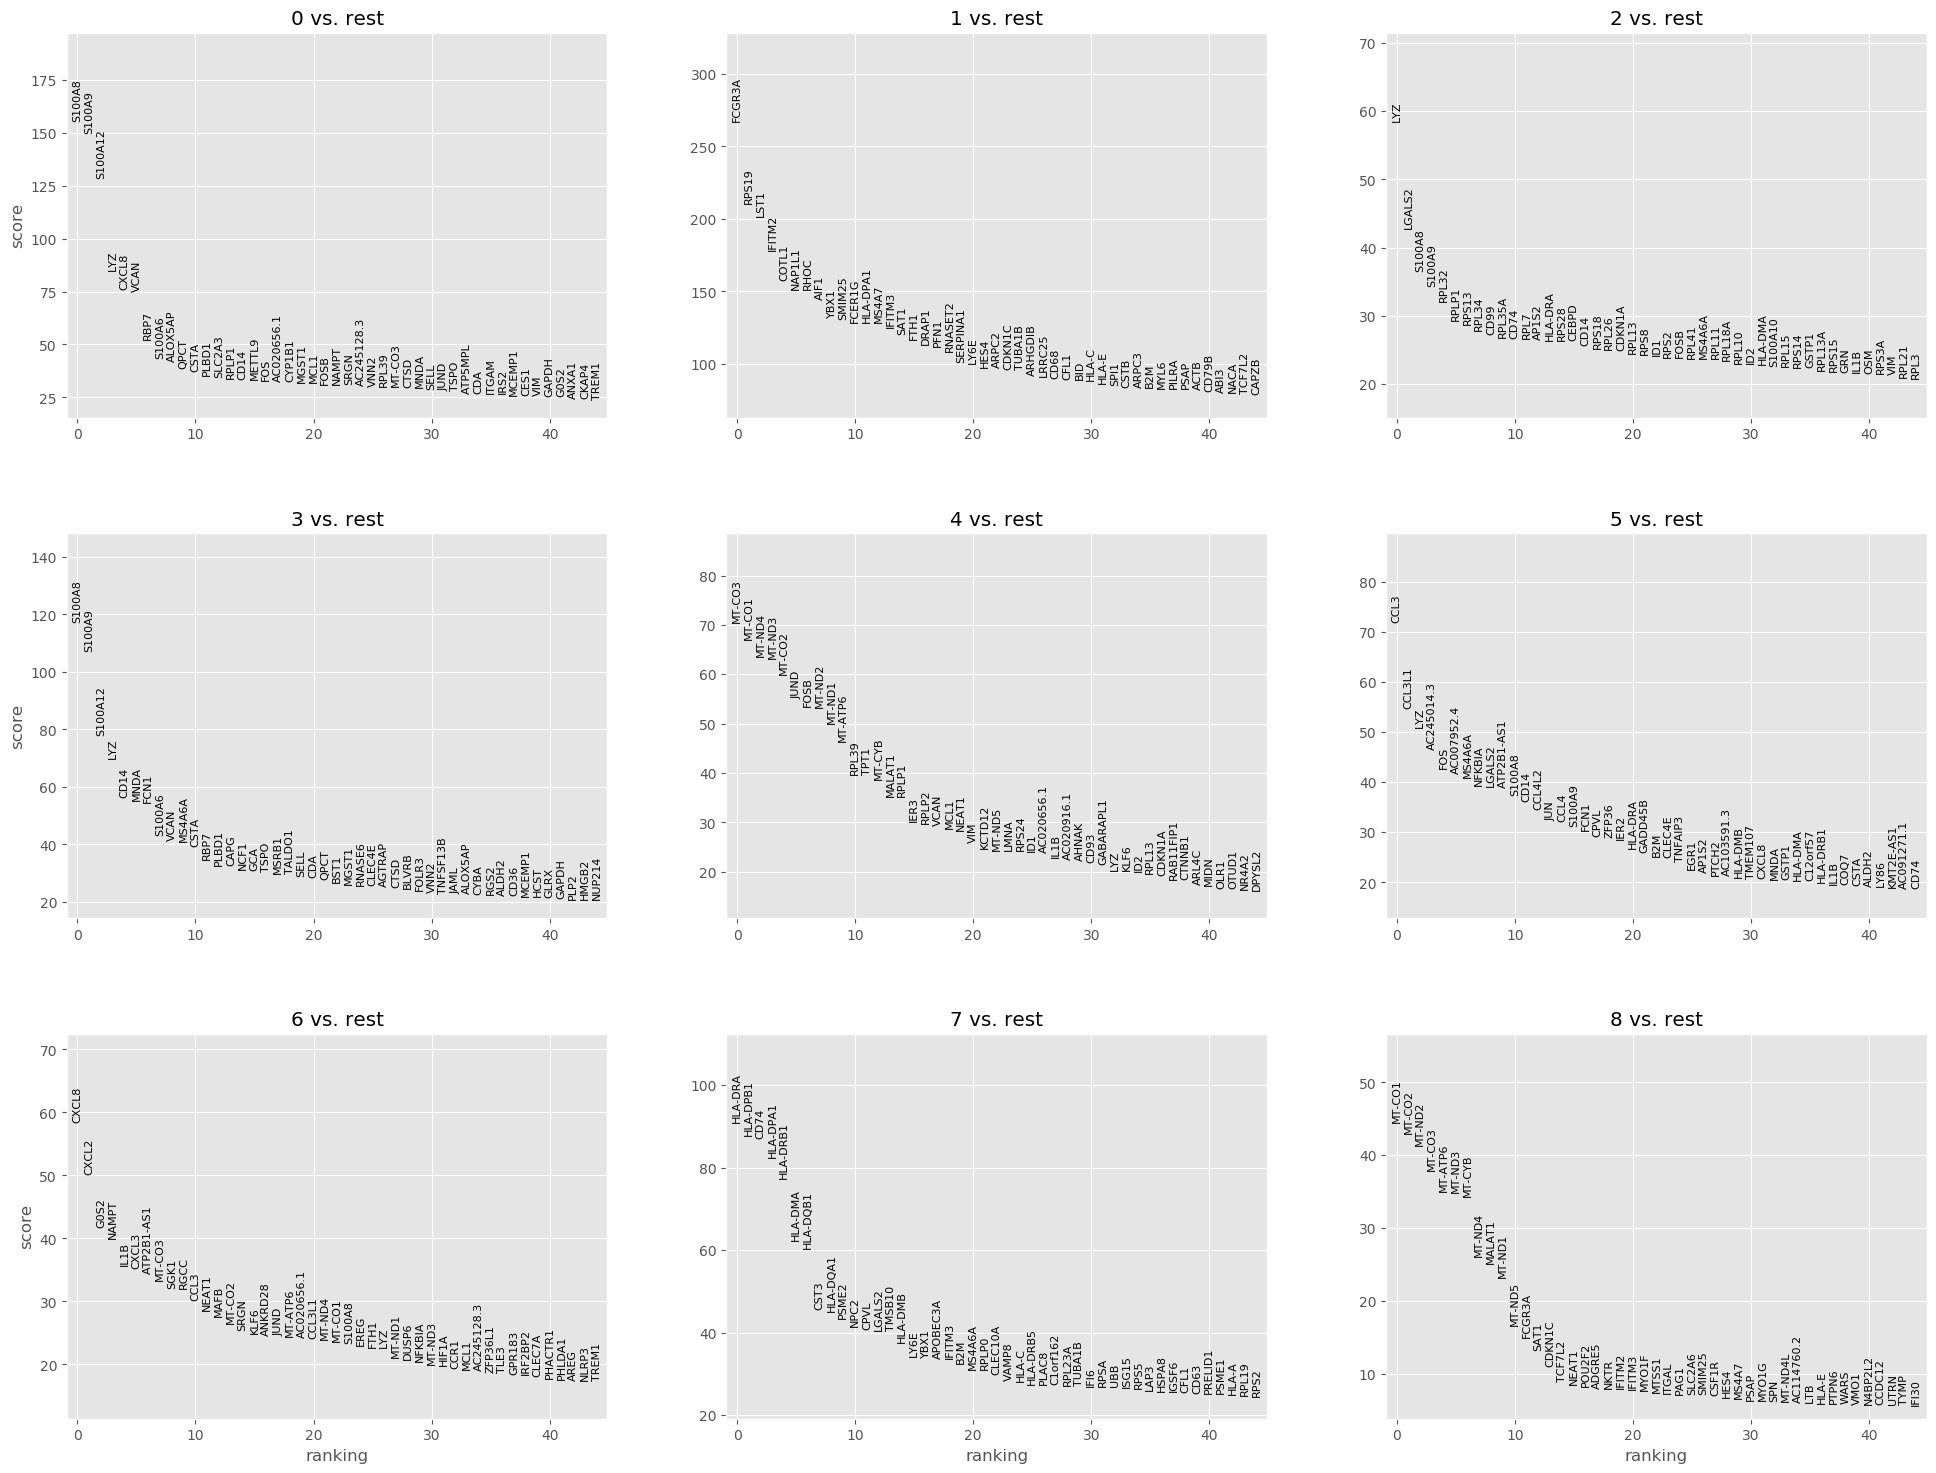

In [33]:
#-- Finding marker genes
matplotlib.style.use('ggplot') 
rcParams['figure.figsize'] = (8,6)
sc.tl.rank_genes_groups(mono, 'louvain', method='t-test')
sc.pl.rank_genes_groups(mono, n_genes=45, sharey=False,ncols=3)

In [14]:
adata_BC.obs['Sample_ids'].value_counts().filter(like='PV', axis=0)

PV013    5097
PV042    5051
PV018    3286
PV006    3253
Name: Sample_ids, dtype: int64

In [57]:
cDC.write('./H5AD/cDC_LifeSpan_61samples.h5ad')
cDC

AnnData object with n_obs × n_vars = 4542 × 1094 
    obs: 'Gender', 'Samples', 'Names', 'Age', 'Batches', 'Groups', 'Sample_ids', 'IDs', 'doublet_score', 'predicted_doublets_1', 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'clusters'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Batches_colors', 'Groups_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'dendrogram_clusters', 'clusters_colors', 'dendrogram_louvain', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [12]:
corrected.obs['Sample_ids'].value_counts().filter(like='PV', axis=0)

PV013    3481
PV042    2862
PV006    1508
PV018    1325
Name: Sample_ids, dtype: int64

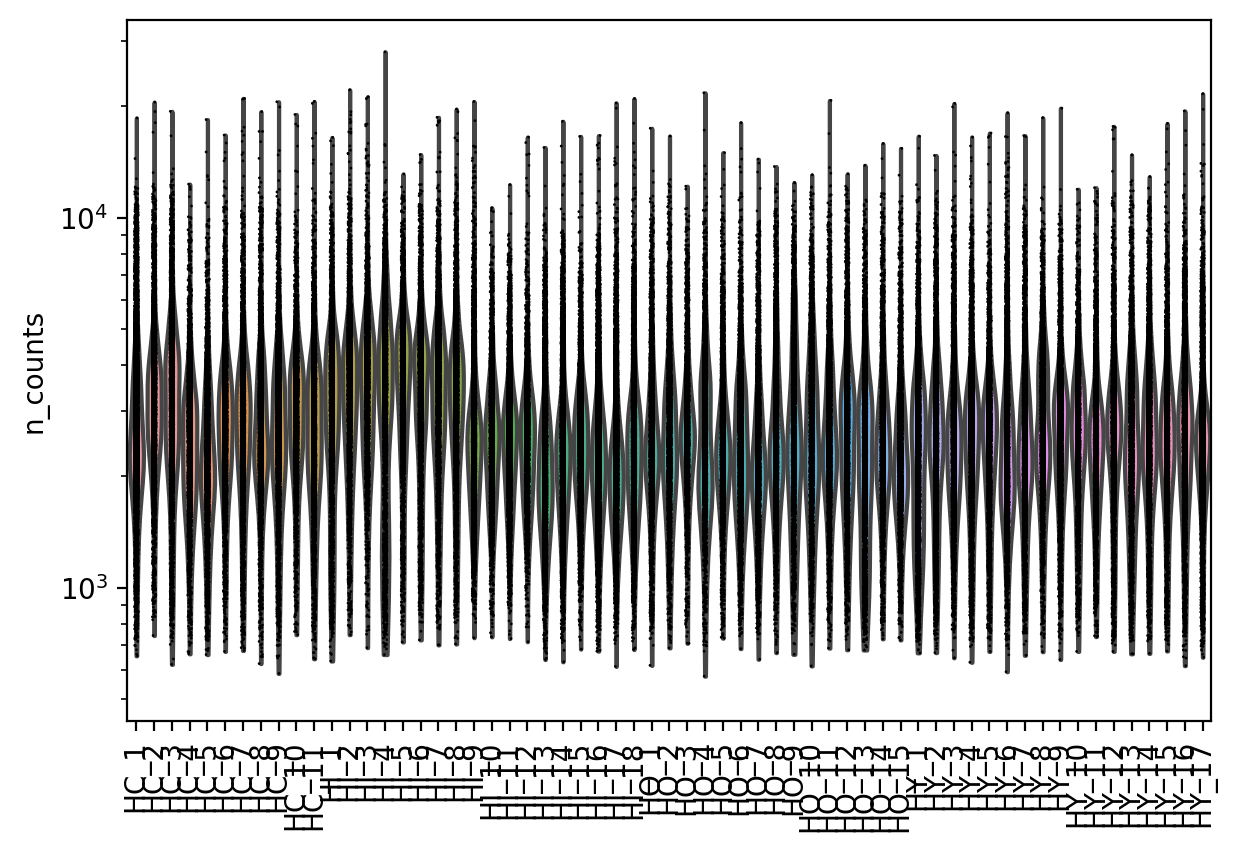

In [73]:
matplotlib.style.use('default')   
sc.pl.violin(corrected, 'n_counts', groupby='Names', size=1, log=True, cut=0,figsize=(4,10), rotation =90)


In [68]:
import seaborn as sb

/home/nehard/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


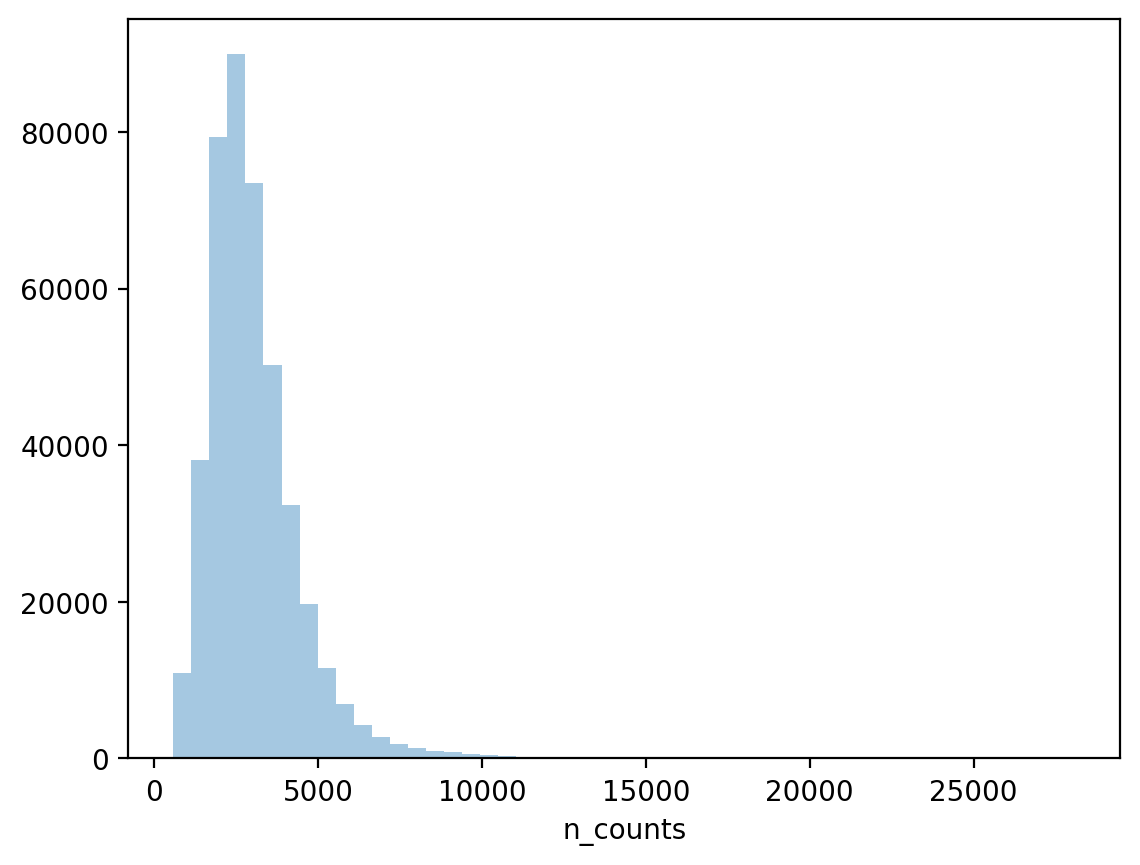

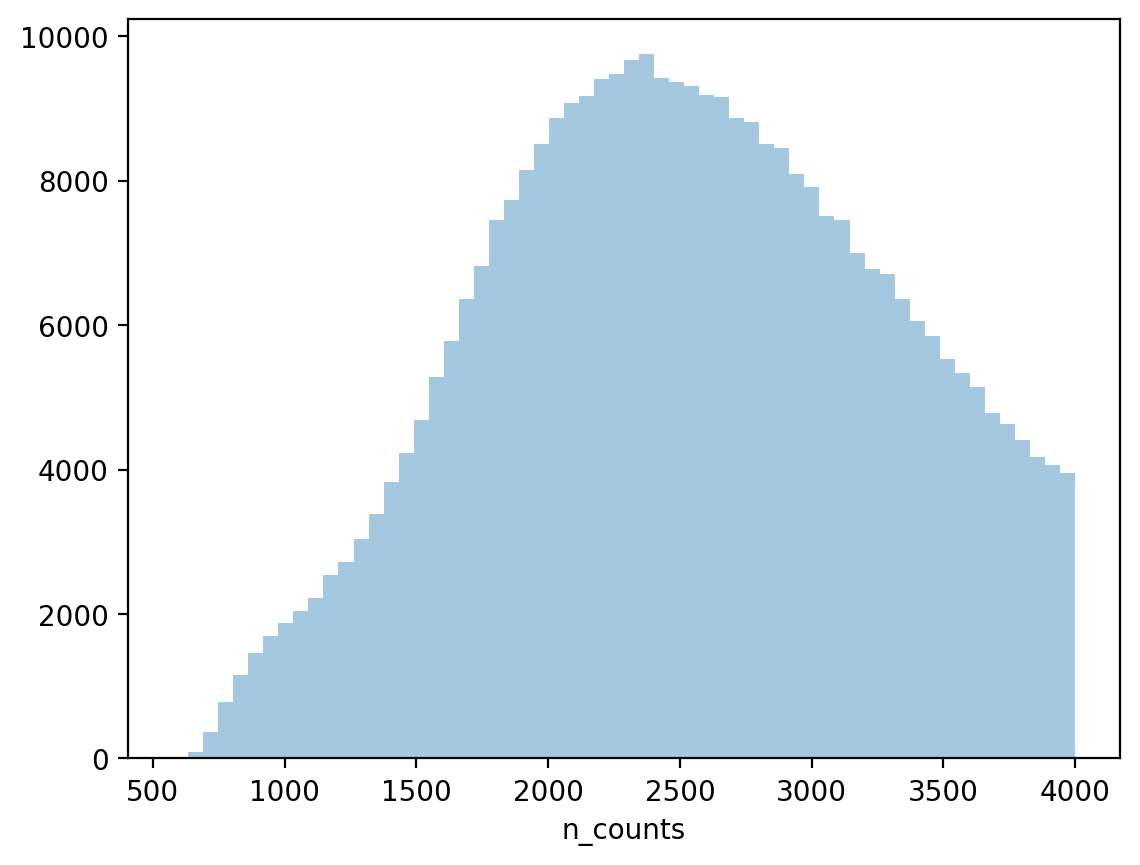

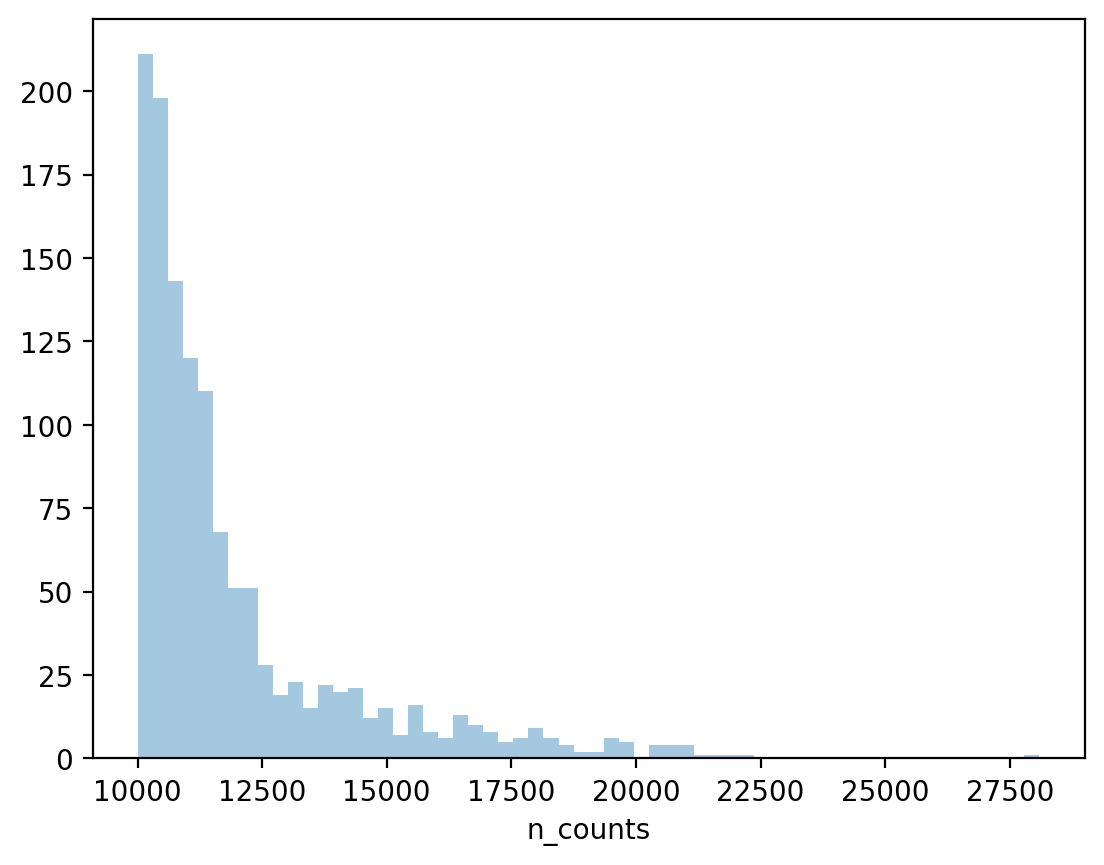

In [70]:
p3 = sb.distplot(corrected.obs['n_counts'], kde=False)
plt.show()

p4 = sb.distplot(corrected.obs['n_counts'][corrected.obs['n_counts']<4000], kde=False, bins=60)
plt.show()

p5 = sb.distplot(corrected.obs['n_counts'][corrected.obs['n_counts']>10000], kde=False, bins=60)
plt.show()

/home/nehard/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


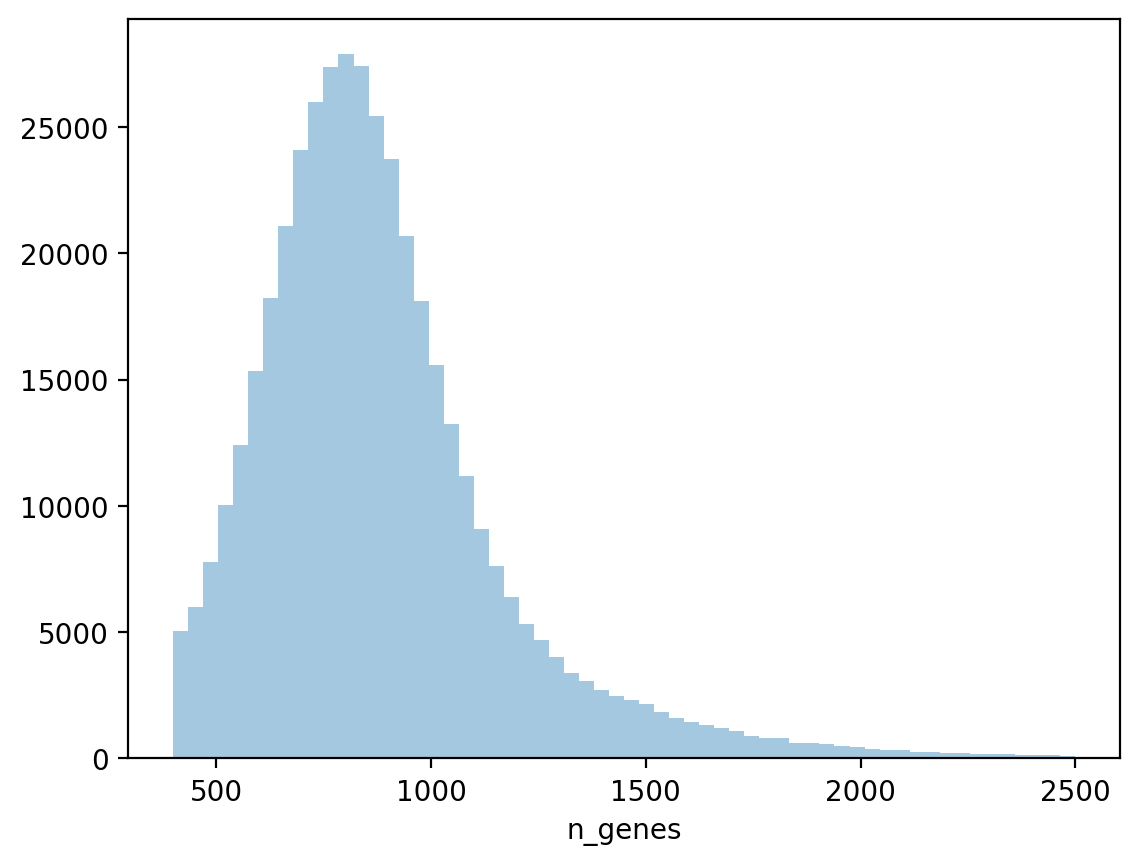

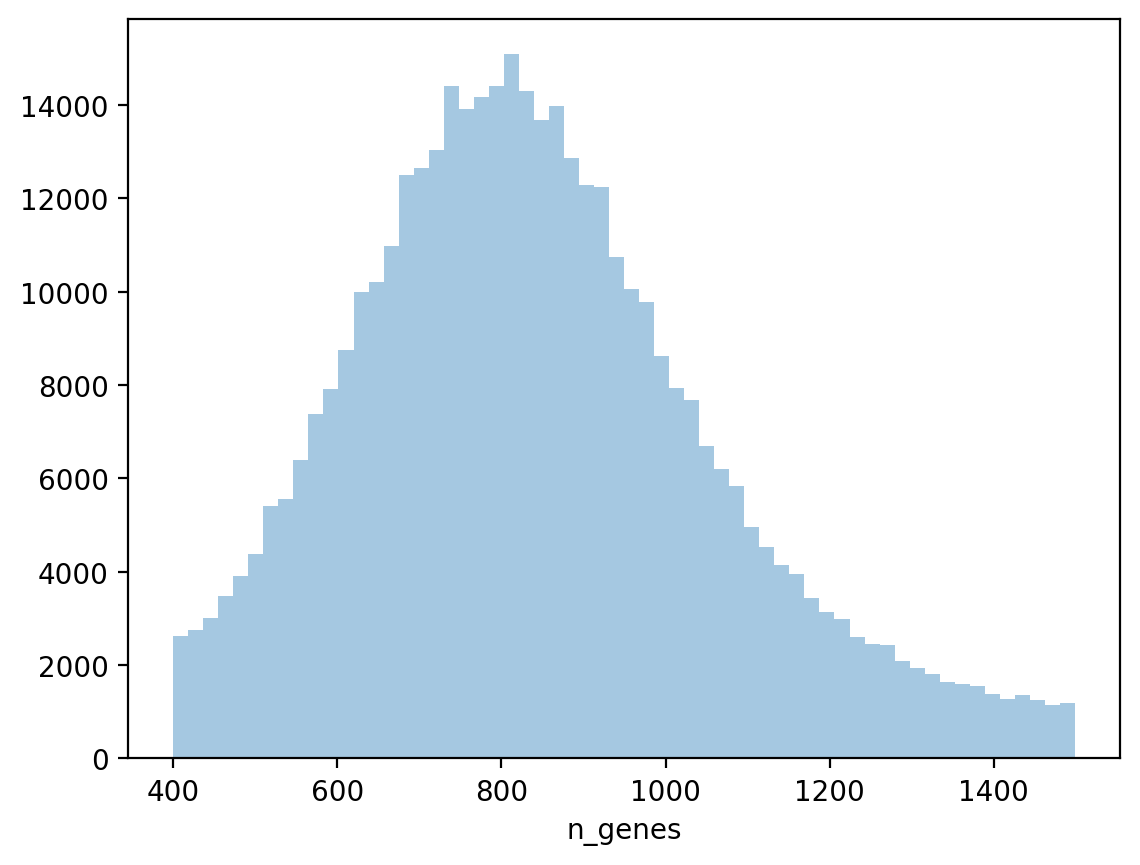

In [72]:
#Thresholding decision: genes
p6 = sb.distplot(corrected.obs['n_genes'], kde=False, bins=60)
plt.show()

p7 = sb.distplot(corrected.obs['n_genes'][corrected.obs['n_genes']<1500], kde=False, bins=60)
plt.show()

In [42]:
mono

AnnData object with n_obs × n_vars = 53978 × 1094 
    obs: 'Gender', 'Samples', 'Names', 'Age', 'Batches', 'Groups', 'Sample_ids', 'IDs', 'doublet_score', 'predicted_doublets_1', 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'clusters'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Batches_colors', 'Groups_colors', 'clusters_colors', 'dendrogram_clusters', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'dendrogram_louvain', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'